# **Importamos algunas librerias y leemos los datos**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##?
from keras.preprocessing.text import one_hot
import seaborn as sns 
from scipy import stats

from sklearn.model_selection import train_test_split

import re
import nltk 
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download("punkt")


from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

###

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv("IMDB Dataset.csv")

**Revisamos algunos datos de los datos:**

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
print("Columnas: ", data.columns, "\n")
print("Dimensiones: ", data.shape, "\n")

Columnas:  Index(['review', 'sentiment'], dtype='object') 

Dimensiones:  (50000, 2) 



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Analizamos la primera reivsion y verificamos la existencia de valores nulos**

In [ ]:
# Checking the first review
data.iloc[0][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Reviews
**Positive words** : wonderful, extremely, well, stunning, good, talent, favorite, tears, thumbs up, excidement, like, laughter, love, liked, great.

---
**Negative words** : Slower, ruins, not funny,dropped off, painfully, worst,awful, cheap, nasty, boring.

# **Empezamos a limpiar los datos y analisarlos, vamos a reemplazar ocurrencias especiales en los reviews**

Como nuestro dataset se basa en elementos obtenidos de la web, es bastante común encontrarse con distintos elementos que deben ser purgados de las reviews:
   

>  URL's


> Tags a otras cuentas ej. @user123


> Elementos HTML


> Caracteres especiales No deseados

> Mayusculas (transformar a minusculas)


> Stop Words





In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def cleaning():
  #Cleaning URL's
  data["review"]=data["review"].map(remove_emoji)
  data["review"]=data["review"].str.replace(r"http\S+","URL")
  data["review"]=data["review"].str.replace(r"Http\S+","URL")
  data["review"]=data["review"].str.replace(r"HTTP\S+","URL")
  #Cleaning tags
  data["review"]=data["review"].str.replace(r"@\S+","")
  #Cleaning HTML
  data["review"]=data["review"].str.replace(r"<br /><br />","")
  data["review"]=data["review"].str.replace(r"/><br />","")
  #Cleaning special Characters
  data["review"]=data["review"].str.replace(r"[^a-zA-Z]"," ")
  data["review"]=data["review"].str.replace(r"\\W"," ")
  #Converting all word to lower
  data["review"]=data["review"].str.lower()

In [ ]:
cleaning()

In [ ]:
# Giving a code to sentiment column
data["sentiment"] = data["sentiment"].replace("positive",1)
data["sentiment"] = data["sentiment"].replace("negative",0)

In [ ]:
# Creating the instance for lemmatizer
lemmatizer = WordNetLemmatizer()
##?
corpus = []

In [ ]:
def PreProcessing(review):
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    return review

In [ ]:
# Processing data
data['review_clean_array'] = data['review'].apply(lambda x: PreProcessing(x))

In [ ]:
data.head()

,review,sentiment,review_clean_array
0,one of the other reviewers has mentioned that ...,1,"[one, reviewer, mentioned, watching, oz, episo..."
1,a wonderful little production the filming tec...,1,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there s a family where a little boy ...,0,"[basically, family, little, boy, jake, think, ..."
4,petter mattei s love in the time of money is...,1,"[petter, mattei, love, time, money, visually, ..."


In [ ]:
data.shape

(50000, 3)

In [ ]:
data['review_clean'] = data['review_clean_array'].apply(lambda x: ' '.join(x))

In [ ]:
data.head()

,review,sentiment,review_clean_array,review_clean
0,one of the other reviewers has mentioned that ...,1,"[one, reviewer, mentioned, watching, oz, episo...",one reviewer mentioned watching oz episode hoo...
1,a wonderful little production the filming tec...,1,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically there s a family where a little boy ...,0,"[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...
4,petter mattei s love in the time of money is...,1,"[petter, mattei, love, time, money, visually, ...",petter mattei love time money visually stunnin...


In [ ]:
data.shape

(50000, 4)

In [ ]:
data.to_csv("clean_data.csv",index=False)

In [4]:
dataProcessed = pd.read_csv("clean_data.csv")

In [5]:
dataProcessed.iloc[0][0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [6]:
dataProcessed.shape

(50000, 4)

In [7]:
dataProcessed.head()

,review,sentiment,review_clean_array,review_clean
0,one of the other reviewers has mentioned that ...,1,"['one', 'reviewer', 'mentioned', 'watching', '...",one reviewer mentioned watching oz episode hoo...
1,a wonderful little production the filming tec...,1,"['wonderful', 'little', 'production', 'filming...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,"['thought', 'wonderful', 'way', 'spend', 'time...",thought wonderful way spend time hot summer we...
3,basically there s a family where a little boy ...,0,"['basically', 'family', 'little', 'boy', 'jake...",basically family little boy jake think zombie ...
4,petter mattei s love in the time of money is...,1,"['petter', 'mattei', 'love', 'time', 'money', ...",petter mattei love time money visually stunnin...


In [8]:
dataProcessed.iloc[0][3]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz m

In [9]:
phrases = dataProcessed['review_clean_array'].tolist()

In [10]:
len(phrases)

50000

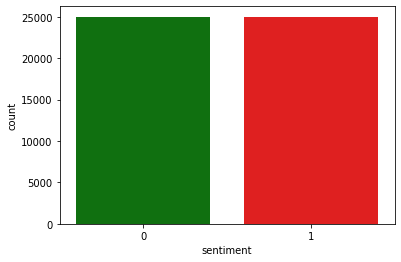

1    25000
0    25000
Name: sentiment, dtype: int64


In [11]:
sns.countplot(dataProcessed["sentiment"], palette = ["green","red"])
plt.show()
print(dataProcessed.sentiment.value_counts())

In [12]:
pos=' '.join(map(str,(dataProcessed[dataProcessed['sentiment']==1])["review_clean"]))
neg=' '.join(map(str,(dataProcessed[dataProcessed['sentiment']==0])["review_clean"]))


In [13]:
wordcloudPositive = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(pos) 

(-0.5, 799.5, 799.5, -0.5)

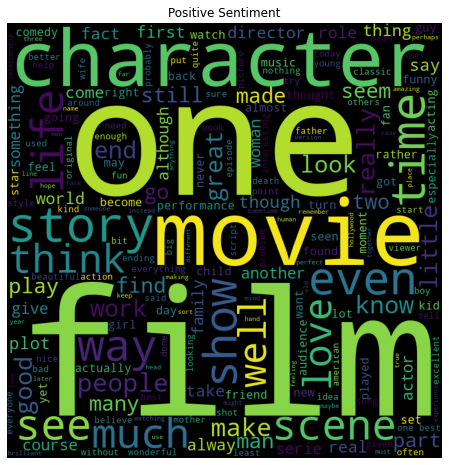

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloudPositive)
plt.title('Positive Sentiment')
plt.axis('off')

In [15]:
wordcloudNegative = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(neg) 

(-0.5, 799.5, 799.5, -0.5)

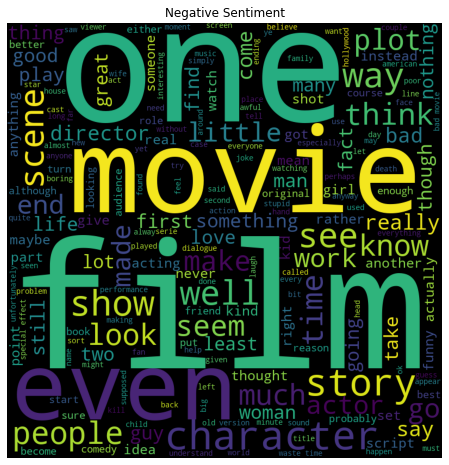

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloudNegative)
plt.title('Negative Sentiment')
plt.axis('off')

In [17]:
def vocabulary_build(reviews):
    print(str(reviews))
    vocab = {}
    for review in reviews:
        review = str(review).replace('[','').replace(']','').replace('"','').replace("'","")
        review = review.replace(' ','').split(',')
        vocab_increase(review,vocab)
    return vocab

def vocab_increase(review, vocab):
    for word in review:
        try:
          vocab[word]+=1
                
        except KeyError:
          vocab[word]=1

In [18]:
rev_list = dataProcessed["review_clean_array"].to_list()

In [19]:
vocabulary = vocabulary_build(rev_list)
vocabulary_size = len(vocabulary)
vocabulary_size

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



91635

In [20]:
vocabulary = { w: vocabulary[w] for w in sorted(vocabulary, key=vocabulary.get, reverse=True)}

In [21]:
positive_vocab = {}
vocab_increase(pos.split(' '),positive_vocab)
len(positive_vocab)

67276

In [22]:
positive_vocab = { w: positive_vocab[w] for w in sorted(positive_vocab, key=positive_vocab.get, reverse=True)}
len(positive_vocab)

67276

In [23]:
negative_vocab = {}
vocab_increase(neg.split(' '),negative_vocab)
len(negative_vocab)

64756

In [24]:
negative_vocab = { w: negative_vocab[w] for w in sorted(negative_vocab, key=negative_vocab.get, reverse=True)}
len(negative_vocab)

64756

In [25]:
general_top_keys = []
general_top_values = []

i = 0
for key,value in vocabulary.items():
    if i == 20:
      break
    general_top_keys.append(key)
    general_top_values.append(value)
    i += 1


In [26]:
general_positive_keys = []
general_positive_values = []

i = 0
for key,value in positive_vocab.items():
    if i == 20:
      break
    general_positive_keys.append(key)
    general_positive_values.append(value)
    i += 1


In [27]:
general_negative_keys = []
general_negative_values = []

i = 0
for key,value in negative_vocab.items():
    if i == 20:
      break
    general_negative_keys.append(key)
    general_negative_values.append(value)
    i += 1


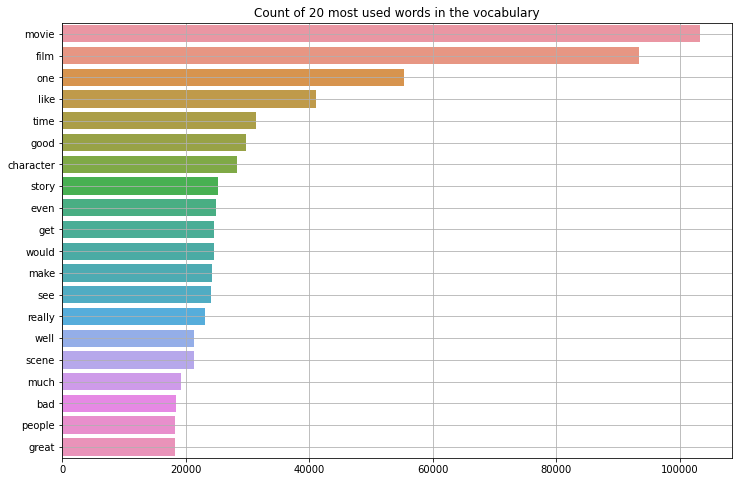

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x=general_top_values,y=general_top_keys).set_title('Count of 20 most used words in the vocabulary')
plt.grid()

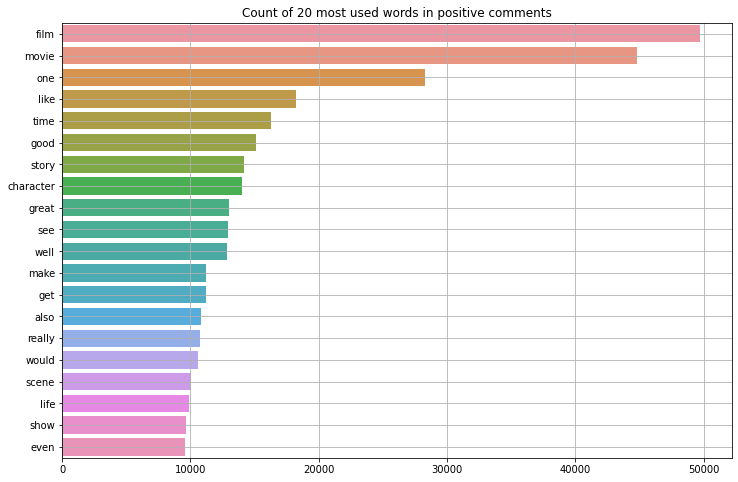

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=general_positive_values,y=general_positive_keys).set_title('Count of 20 most used words in positive comments')
plt.grid()

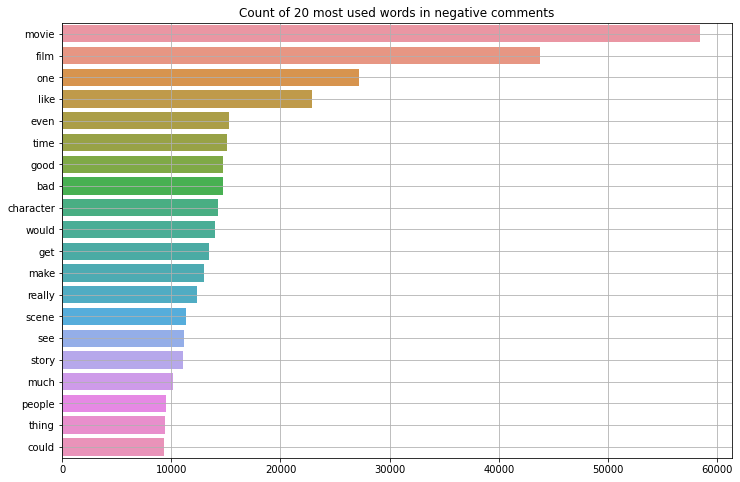

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x=general_negative_values,y=general_negative_keys).set_title('Count of 20 most used words in negative comments')
plt.grid()

**Verifying one more time if there still garbage**

In [31]:
print("Verify for Html elements: ",dataProcessed['review_clean'].str.contains("<br />").sum())
print("Verify for (>): ",dataProcessed['review_clean'].str.contains(">").sum())
print("Verify for (<): ",dataProcessed['review_clean'].str.contains("<").sum())
print("Verify for (@): ",dataProcessed['review_clean'].str.contains("@").sum())
print("Verify for (http): ",dataProcessed['review_clean'].str.contains("http").sum())

Verify for Html elements:  0
Verify for (>):  0
Verify for (<):  0
Verify for (@):  0
Verify for (http):  0


**Numerizamos las palabras**

In [32]:
tokendata  = pd.DataFrame()
tokendata["review"] = dataProcessed["review_clean"].apply(lambda x: str(x))
tokendata["sentiment"] = dataProcessed["sentiment"]
tokendata["review"].shape

(50000,)

In [33]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 60000)
tokenizer.fit_on_texts(tokendata["review"])

In [34]:
tokendata.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


In [35]:
x_train_tokens = tokenizer.texts_to_sequences(tokendata["review"])

In [36]:
len(x_train_tokens)

50000

In [37]:
num_tokens = [len(tokens) for tokens in x_train_tokens]
num_tokens = np.array(num_tokens)

In [38]:
num_tokens

array([162,  86,  84, ..., 113, 112,  66])

In [39]:
np.max(num_tokens)

1392

In [40]:
np.min(num_tokens)

3

In [41]:
np.mean(num_tokens)

117.4932

In [42]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

295

In [43]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.94516

In [44]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)

In [45]:
x_train_pad.shape

(50000, 295)

In [46]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [47]:
return_to_sentence(x_train_pad[0])

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz m

In [48]:
x_train_pad[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

# **Empezamos a construir nuestros modelos**

*Dividimos el set de datos*

In [49]:
x = x_train_pad
y = tokendata["sentiment"]

In [50]:
#Train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)

Creamos el modelo LSTM (long short-term memory tipo de red neuronal recurrente)

In [51]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=60000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer'))

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 295, 50)           3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 295, 16)           4288      
_________________________________________________________________
dropout (Dropout)            (None, 295, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 295, 8)            800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 295, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0

In [53]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/5
28/28 [==============================] - 64s 2s/step - loss: 0.6905 - accuracy: 0.5348 - val_loss: 0.6568 - val_accuracy: 0.7444
Epoch 2/5
28/28 [==============================] - 57s 2s/step - loss: 0.6126 - accuracy: 0.8075 - val_loss: 0.5386 - val_accuracy: 0.8358
Epoch 3/5
28/28 [==============================] - 58s 2s/step - loss: 0.5039 - accuracy: 0.8783 - val_loss: 0.4961 - val_accuracy: 0.8429
Epoch 4/5
28/28 [==============================] - 58s 2s/step - loss: 0.4331 - accuracy: 0.9167 - val_loss: 0.4605 - val_accuracy: 0.8482
Epoch 5/5
28/28 [==============================] - 58s 2s/step - loss: 0.3738 - accuracy: 0.9355 - val_loss: 0.4294 - val_accuracy: 0.8533


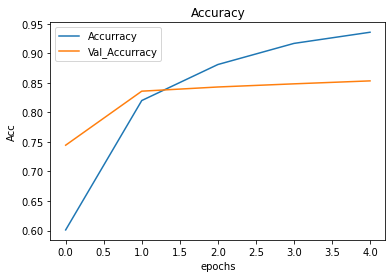

In [90]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Accurracy")
plt.plot(history.history["val_accuracy"], label = "Val_Accurracy")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

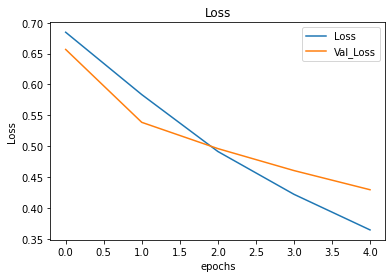

In [91]:
plt.figure()
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Val_Loss")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

**Multinomial Naive Bayes**

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
multi = MultinomialNB()

In [81]:
multi.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
y_pred = multi.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [83]:
score = 0
for i in range(0,len(y_test.to_list())):
  if y_pred[i] == y_test.to_list()[i]:
    score += 1

score /= len(y_test.to_list())
score

0.5051

**SVC**

In [62]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [64]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [65]:
y_pred_svc = clf.predict(x_test)
y_pred_svc

array([1, 0, 0, ..., 0, 1, 0])

In [66]:
score = 0
for i in range(0,len(y_test.to_list())):
  if y_pred_svc[i] == y_test.to_list()[i]:
    score += 1

score /= len(y_test.to_list())
score

0.5207

**Evaluating the models**

**LSTM**

In [72]:
result = model.evaluate(x_test, y_test)

313/313 [==============================] - 27s 87ms/step - loss: 0.4228 - accuracy: 0.8602




> 40 mil palabras loss: 0.3412 - accuracy: 0.9382 - val_loss: 0.4068 - val_accuracy: 0.8578, loss: 0.3962 - accuracy: 0.8648

> 80 mil palabras loss: 0.3618 - accuracy: 0.9261 - val_loss: 0.4252 - val_accuracy: 0.8443, loss: 0.4223 - accuracy: 0.8469


> 60 mil paralabras loss: 0.3119 - accuracy: 0.9227 - val_loss: 0.3697 - val_accuracy: 0.8650, loss: 0.3632 - accuracy: 0.8675







**Naive Bayes**

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


              precision    recall  f1-score   support

           0       0.82      0.50      0.62      8168
           1       0.19      0.52      0.28      1832

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.45     10000
weighted avg       0.71      0.51      0.56     10000

Accuracy Score of Naive Bayes: 50.51 %


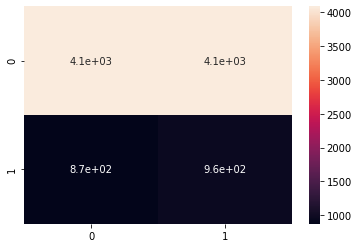

In [85]:
acc1 = accuracy_score(y_pred,y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
print(report)
print("Accuracy Score of Naive Bayes:",acc1*100,"%")

**SVC**

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      6280
           1       0.39      0.53      0.45      3720

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.55      0.52      0.53     10000

Accuracy Score of SVC: 52.07000000000001 %


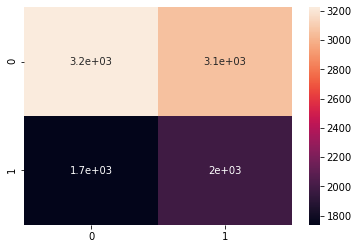

In [69]:
acc = accuracy_score(y_pred_svc,y_test)
report = classification_report(y_pred_svc, y_test)
cm = confusion_matrix(y_pred_svc,y_test)
sns.heatmap(cm,annot=True)
print(report)
print("Accuracy Score of SVC:",acc*100,"%")
